# Breast cancer predicting model - ML

Based on this dataset: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data


> Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

> This database is also available through the UW CS ftp server:
ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

> Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

# 0 - Intro

> **I started studying Machine learning in Nov/2020 and this is my very first analysis.
> All constructive comments will be appreciated.**

# 1 - Exploratory data analysis

 **Attribute Information:**

1) ID number

2) Diagnosis (M = malignant, B = benign) 

3)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import neighbors
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score,confusion_matrix, accuracy_score, plot_confusion_matrix #utilizada para verificar a acurácia do modelo construído
from sklearn.svm import SVC #utilizada para importar o algoritmo SVM
#from sklearn.linear_model import LinearRegression
#import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier

/kaggle/input/breast-cancer-wisconsin-data/data.csv


In [2]:
#Gets de dataset as a DataFrame
ds = pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')

In [3]:
ds.shape

(569, 33)

In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [6]:
ds.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
ds.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


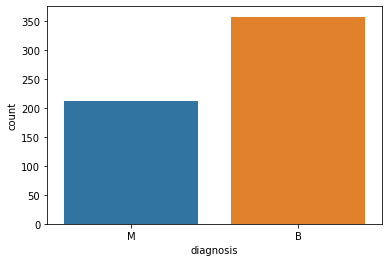

In [8]:
sns.countplot(data=ds, x='diagnosis')
plt.show()

# 2 - Dataset preparation

In [9]:
# Transform the class column (diagnosis) into a int64
# 0 = Benign
# 1 = Malignant

#ds.diagnosis = ds.diagnosis == 'M'
#ds.diagnosis = ds.diagnosis.astype('int')
# OR
ds['diagnosis'] = ds['diagnosis'].map({'M':1,'B':0})

In [10]:
# Drop columns "id" and "Unnamed: 32"
ds.drop(['id','Unnamed: 32'], axis= 1, inplace=True)

# 3 - Create train and test datasets

In [11]:
# Create different arrays for features and target
x = ds.iloc[:, 1:-1]
y = ds.iloc[:, 0]

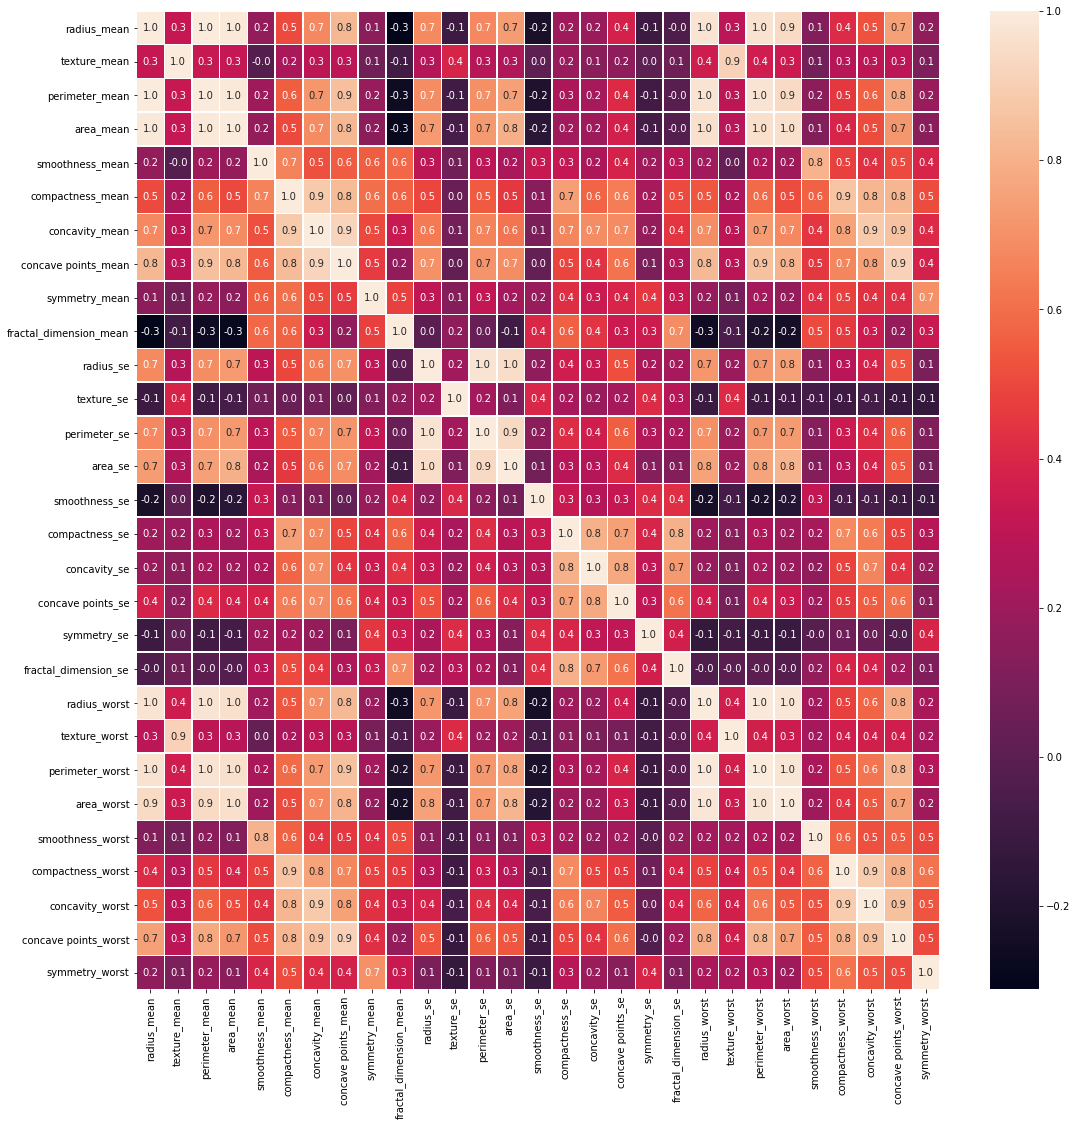

In [12]:
# Correlation between all features
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

#As we can see, there are many features that are strongly correlated. I decided to use all features.
#To be done: eliminate unuseful features

In [13]:
# Create train and test datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify = y)

# 4 - Models

I used the default parameters for all models

# 4.1 - SVM

In [14]:
modelSVM = SVC(kernel = 'linear')
modelSVM.fit(x_train, y_train)
labels_svm = modelSVM.predict(x_test)
score_svm = modelSVM.score(x_test, y_test)
print("Score (Decision tree): %f" % score_svm)
conf_mx_svm = confusion_matrix(y_test, labels_svm)
scores = [score_svm]

Score (Decision tree): 0.929825


# 4.2 - Decision Tree

In [15]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
labels_tree = tree.predict(x_test)
score_tree = tree.score(x_test, y_test)
print("Score (Decision tree): %f" % score_tree)
conf_mx_tree = confusion_matrix(y_test, labels_tree)
#accuracia = accuracy_score(y_test, labels_tree)
#print ("Acuracia utilizando o SVM :" , accuracia , "\nEm porcentagem : ", round(accuracia*100) , "%\n")
scores.append(score_tree)

Score (Decision tree): 0.903509


# 4.3 - Logistic regression

In [16]:
logreg = LogisticRegression(max_iter=3000)
logreg.fit(x_train, y_train)
labels_logreg = logreg.predict(x_test)
conf_mx_logreg = confusion_matrix(y_test, labels_logreg)
score_lr = logreg.score(x_test, y_test)
print("Score (logistic regression): %f" % score_lr)
scores.append(score_lr)

Score (logistic regression): 0.938596


# 4.4 - Random forest

In [17]:
forest = RandomForestClassifier()
forest.fit(x_train, y_train)
labels_rf = forest.predict(x_test)
conf_mx_rf = confusion_matrix(y_test, labels_rf)
score_rf = forest.score(x_test, y_test)
print("Score (Random forest): %f" % score_rf)
scores.append(score_rf)

Score (Random forest): 0.964912


# 4.5 - KNN

In [18]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 9)
knn.fit(x_train, y_train)
labels_knn = knn.predict(x_test)
score_knn = knn.score(x_test, y_test)
print("Score (KNN): %f" % score_knn)
conf_mx_knn = confusion_matrix(y_test, labels_knn)
scores.append(score_knn)
#print("R2 Score %f " % r2_score(y_test, labels_knn))
#knn.score(x_test, y_test) , np.mean(labels_knn == y_test), (labels_knn == y_test).sum() / len(x_test), "R2 Score %f " % r2_score(y_test, labels_knn)

Score (KNN): 0.921053


# 5 - Models validation
# 5.1 - Confusion matrix

In [19]:
def DisplayConfusionMatrix(_classifier, _title):
    df_cm_svm = pd.DataFrame(_classifier, index = [i for i in "01"],columns = [i for i in "01"])
    disp = plot_confusion_matrix(_classifier, x_test, y_test,
                                 display_labels = ['Benign','Malignant'],
                                 cmap = plt.cm.Blues,
                                 normalize = None)
    disp.ax_.set_title(_title)

    #print(_title)
    #print(disp.confusion_matrix)

In [20]:
#https://medium.com/analytics-vidhya/evaluating-a-random-forest-model-9d165595ad56

def DisplayConfusionMatrix_2(_y_pred, _title):
    matrix = confusion_matrix(y_test, _y_pred)
    #matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]  # if we want %

    # Build the plot
    plt.figure(figsize=(7,7))
    sns.set(font_scale=1.4)
    sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Blues, linewidths=0.2)

    # Add labels to the plot
    class_names = ['Benign','Malignant']
    tick_marks = np.arange(len(class_names))
    tick_marks2 = tick_marks + 0.5
    plt.xticks(tick_marks, class_names, rotation=25)
    plt.yticks(tick_marks2, class_names, rotation=0)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title(_title)
    plt.show()

# 5.1.1 - SVM - Confusion Matrix

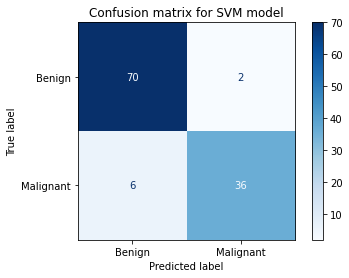

In [21]:
DisplayConfusionMatrix(modelSVM,"Confusion matrix for SVM model")

# 5.1.2 - Decision Tree - Confusion Matrix

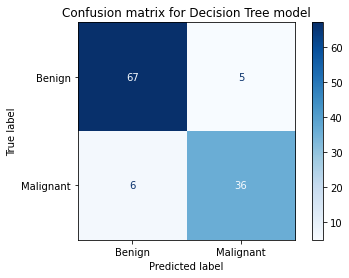

In [22]:
DisplayConfusionMatrix(tree,"Confusion matrix for Decision Tree model")

# 5.1.3 - Logistic Regression - Confusion Matrix

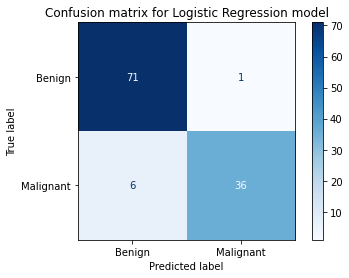

In [23]:
DisplayConfusionMatrix(logreg,"Confusion matrix for Logistic Regression model")

# 5.1.4 - Random Forest - Confusion Matrix

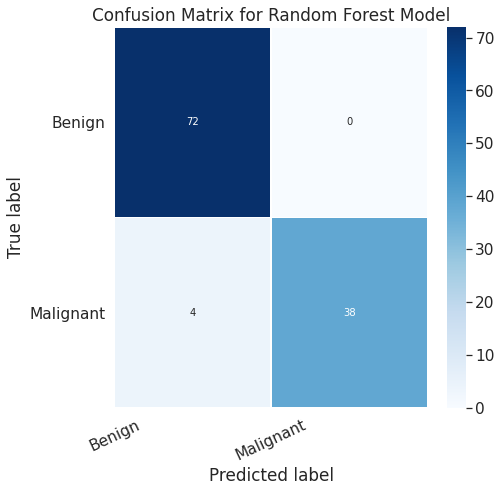

In [24]:
DisplayConfusionMatrix_2(labels_rf, 'Confusion Matrix for Random Forest Model')

# 5.1.5 - KNN - Confusion Matrix

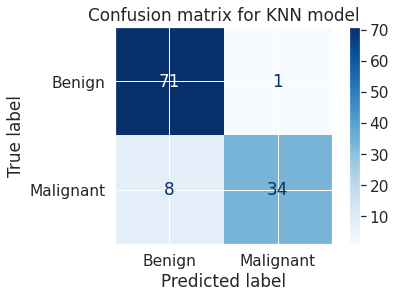

In [25]:
DisplayConfusionMatrix(knn,"Confusion matrix for KNN model")

# 5.2 - Importance of each feature

In [26]:
def FeatureImportance (_model):
    fi = pd.DataFrame({'feature': list(x_train.columns),
                       'importance': _model.feature_importances_}).sort_values('importance', ascending = False)
    return fi

# 5.2.1 - SVM

In [27]:
#To be implemented

#FeatureImportance(modelSVM)
#def f_importances(coef, names):
#    imp = coef
#    imp,names = zip(*sorted(zip(imp,names)))
#    plt.barh(range(len(names)), imp, align='center')
#    plt.yticks(range(len(names)), names)
#    plt.show()

#features_names
#f_importances(modelSVM.coef_, features_names)
#modelSVM.coef_

# 5.2.2 - Decision Tree

In [28]:
FeatureImportance(tree)

,feature,importance
22,perimeter_worst,0.727477
27,concave points_worst,0.067700
1,texture_mean,0.042567
24,smoothness_worst,0.040833
4,smoothness_mean,0.023791
3,area_mean,0.022452
21,texture_worst,0.018744
7,concave points_mean,0.017530
23,area_worst,0.015606
16,concavity_se,0.007043


  # 5.2.3 - Logistic Regression

In [29]:
#To be implemented

 # 5.2.4 - Random Forest

In [30]:
FeatureImportance(forest)

,feature,importance
23,area_worst,0.132420
22,perimeter_worst,0.112004
20,radius_worst,0.104756
27,concave points_worst,0.088172
7,concave points_mean,0.083287
6,concavity_mean,0.082856
3,area_mean,0.065509
0,radius_mean,0.062638
2,perimeter_mean,0.045317
26,concavity_worst,0.027024


# 5.2.5 - KNN

In [31]:
#To be implemented

# 6 - Deep learning - Tensorflow and Keras

"Deep Learning com Python de A a Z - O Curso Completo" - https://www.udemy.com/course/deep-learning-com-python-az-curso-completo/
Udemy course from https://iaexpert.academy/



TBD - Parameteres tuning

# 6.1 - Using test_split

In [32]:
classifier_split = Sequential()
classifier_split.add(Dense(units = 16, activation = 'relu', 
                        kernel_initializer = 'random_uniform', input_dim = 29))
classifier_split.add(Dense(units = 16, activation = 'relu', 
                        kernel_initializer = 'random_uniform'))
classifier_split.add(Dense(units = 1, activation = 'sigmoid'))

otimizador = keras.optimizers.Adam(lr = 0.001, decay = 0.0001, clipvalue = 0.5)
classifier_split.compile(optimizer = otimizador, loss = 'binary_crossentropy',
                      metrics = ['binary_accuracy'])

# Fit model
classifier_split.fit(x_train, y_train,
                  batch_size = 10, epochs = 100)
# Predict
labels_rn_split = classifier_split.predict(x_test)
labels_rn_split = (previsoes > 0.5)

Epoch 1/100
46/46 [==============================] - 0s 985us/step - loss: 0.5123 - binary_accuracy: 0.7978
Epoch 2/100
46/46 [==============================] - 0s 960us/step - loss: 0.3599 - binary_accuracy: 0.8769
Epoch 3/100
46/46 [==============================] - 0s 878us/step - loss: 0.3526 - binary_accuracy: 0.8747
Epoch 4/100
46/46 [==============================] - 0s 958us/step - loss: 0.2910 - binary_accuracy: 0.9033
Epoch 5/100
46/46 [==============================] - 0s 899us/step - loss: 0.2927 - binary_accuracy: 0.8725
Epoch 6/100
46/46 [==============================] - 0s 922us/step - loss: 0.2304 - binary_accuracy: 0.9209
Epoch 7/100
46/46 [==============================] - 0s 920us/step - loss: 0.2379 - binary_accuracy: 0.9077
Epoch 8/100
46/46 [==============================] - 0s 977us/step - loss: 0.2843 - binary_accuracy: 0.8769
Epoch 9/100
46/46 [==============================] - 0s 934us/step - loss: 0.3171 - binary_accuracy: 0.8659
Epoch 10/100
46/46 [========

NameError: name 'previsoes' is not defined

In [33]:
DisplayConfusionMatrix_2(labels_rn_split, 'Confusion Matrix for Neural Network - Using split')

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [34]:
precision = accuracy_score(y_test, labels_rn_split)
print(precision)
scores.append(precision)
resultado = classifier_split.evaluate(x_test, y_test)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

# 6.2 - Using cross validation

In [35]:
previsores = x
classe = y

def createNeuralNetwork():
    classifier_cv = Sequential()
    classifier_cv.add(Dense(units = 16, activation = 'relu', 
                        kernel_initializer = 'random_uniform', input_dim = 29))
    classifier_cv.add(Dropout(0.2))
    classifier_cv.add(Dense(units = 16, activation = 'relu', 
                        kernel_initializer = 'random_uniform'))
    classifier_cv.add(Dropout(0.2))
    classifier_cv.add(Dense(units = 1, activation = 'sigmoid'))
    otimizador = keras.optimizers.Adam(lr = 0.001, decay = 0.0001, clipvalue = 0.5)
    classifier_cv.compile(optimizer = otimizador, loss = 'binary_crossentropy',
                      metrics = ['binary_accuracy'])
    return classifier_cv

In [36]:
classifier_cv = KerasClassifier(build_fn = createNeuralNetwork,
                                epochs = 100,
                                batch_size = 10)
labels_rn_cv = cross_val_score(estimator = classifier_cv,
                             X = previsores, y = classe,
                             cv = 10, scoring = 'accuracy')

Epoch 1/100
52/52 [==============================] - 0s 1ms/step - loss: 0.8831 - binary_accuracy: 0.5801
Epoch 2/100
52/52 [==============================] - 0s 935us/step - loss: 0.5929 - binary_accuracy: 0.7422
Epoch 3/100
52/52 [==============================] - 0s 999us/step - loss: 0.5345 - binary_accuracy: 0.7676
Epoch 4/100
52/52 [==============================] - 0s 945us/step - loss: 0.4368 - binary_accuracy: 0.8262
Epoch 5/100
52/52 [==============================] - 0s 954us/step - loss: 0.4025 - binary_accuracy: 0.8398
Epoch 6/100
52/52 [==============================] - 0s 1ms/step - loss: 0.3544 - binary_accuracy: 0.8730
Epoch 7/100
52/52 [==============================] - 0s 1ms/step - loss: 0.3378 - binary_accuracy: 0.8984
Epoch 8/100
52/52 [==============================] - 0s 940us/step - loss: 0.3347 - binary_accuracy: 0.8828
Epoch 9/100
52/52 [==============================] - 0s 1ms/step - loss: 0.3276 - binary_accuracy: 0.8867
Epoch 10/100
52/52 [================

In [37]:
media = labels_rn_cv.mean()
scores.append(media)
desvio = labels_rn_cv.std()
print(media)
print(desvio)

0.9280075187969923
0.04029406678116474


# 7 - Conclusion

1. Machine learning: SVM, Decision tree, Random Forest, Logistic regression and KNN<br>
    1.1 All predicting models have a score greater than 0.92
2. Deep learning using test_split<br>
    2.1 Accuracy greater than 0.92
3. Deep learning using cross validation<br>
    3.1 Accuracy greater than 0.92

In [38]:
df_scores = pd.DataFrame({'Model': ['SVM','Decision tree','Random forest','Logistic regression','KNN','Neural network using split', 'Neural network using cross validation'],
                       'Score': scores}).sort_values(['Score', 'Model'],ascending = [False, True])
df_scores

ValueError: arrays must all be same length

# 8 - Appendix

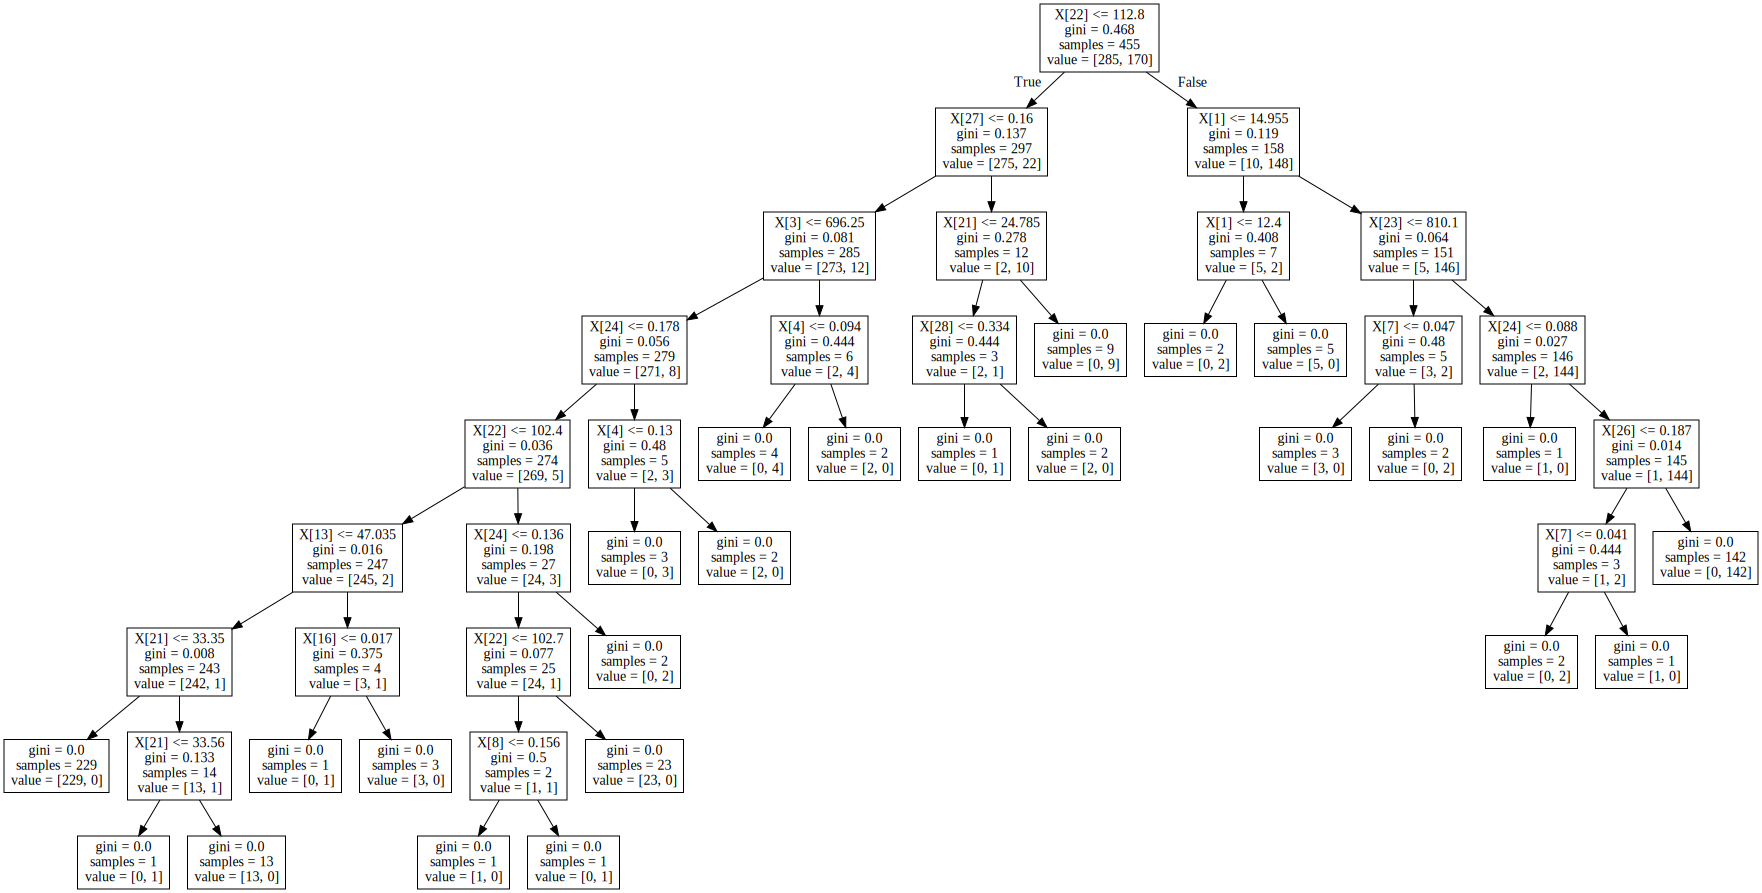

In [39]:
# Graphical representation for Decision tree
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(tree, out_file="mytree.dot")
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)